In [6]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits 
circuit.x(0) # "x" is a "not" gate. It flips the value. Starting value is a 0, so this flips to a 1. 
circuit.cx(0, 1) #cnot, controlled not, Flips 2nd qubit's value if first qubit is 1
circuit.measure([0,1], [0,1])  # ([qbitregister], [classicalbitregister]) Measure qubit 0 and 1 to classical bits 0 and 1

In [7]:
circuit.draw()

┌───┐     ┌─┐   
q_0: |0>┤ X ├──■──┤M├───
        └───┘┌─┴─┐└╥┘┌─┐
q_1: |0>─────┤ X ├─╫─┤M├
             └───┘ ║ └╥┘
 c_0: 0 ═══════════╩══╬═
                      ║ 
 c_1: 0 ══════════════╩═

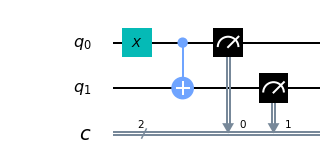

In [8]:
circuit.draw(output="mpl")

In [12]:
from qiskit import IBMQ

IBMQ.save_account("1a78d6121953611de337f48a99a94c5416be952004f4b68af103b60c61d7273c0c0c6caa575531e68d6b8f6ec3837d1f701dfb17e701ead89f583b355613c676")

configrc.store_credentials:WARNING:2020-04-02 02:20:30,882: Credentials already present. Set overwrite=True to overwrite.


In [13]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [20]:
provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} jobs queued and {qubit_count} qubits")

ibmq_qasm_simulator has 0 jobs queued and simulated qubits
ibmqx2 has 2 jobs queued and 5 qubits
ibmq_16_melbourne has 4 jobs queued and 15 qubits
ibmq_vigo has 2 jobs queued and 5 qubits
ibmq_ourense has 2 jobs queued and 5 qubits
ibmq_london has 2 jobs queued and 5 qubits
ibmq_burlington has 1 jobs queued and 5 qubits
ibmq_essex has 2 jobs queued and 5 qubits
ibmq_armonk has 1 jobs queued and 1 qubits


In [21]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmq_burlington")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


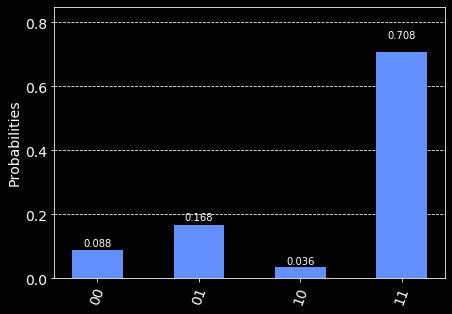

In [23]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use("dark_background")

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [24]:
circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits 
circuit.h(0) # "x" is a "not" gate. It flips the value. Starting value is a 0, so this flips to a 1. 
circuit.cx(0, 1) #cnot, controlled not, Flips 2nd qubit's value if first qubit is 1
circuit.measure([0,1], [0,1])  # ([qbitregister], [classicalbitregister]) Measure qubit 0 and 1 to classical bits 0 and 1
circuit.draw()

┌───┐     ┌─┐   
q_0: |0>┤ H ├──■──┤M├───
        └───┘┌─┴─┐└╥┘┌─┐
q_1: |0>─────┤ X ├─╫─┤M├
             └───┘ ║ └╥┘
 c_0: 0 ═══════════╩══╬═
                      ║ 
 c_1: 0 ══════════════╩═

In [25]:
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


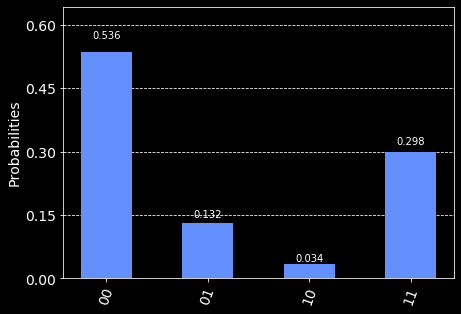

In [26]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [33]:
from qiskit import Aer 

backend = Aer.get_backend("qasm_simulator")

for backend in Aer.backends():
    print(backend)

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


Job Status: job has successfully run


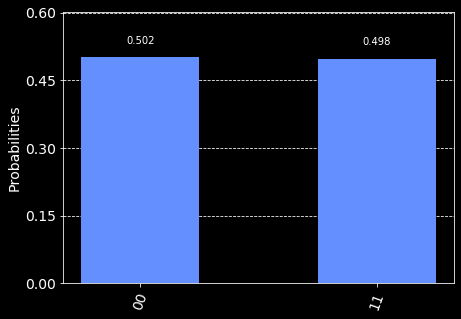

In [35]:
job = q.execute(circuit, backend=sim_backend, shots=500)
job_monitor(job)

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts]) 